# Bank Telemarketing Project - Data Wrangling
***


## Contents<a id='Table of Contents'></a>


- [Imports](#Imports)
- [Load The Bank Data](#Load_The_Bank_Data)
- [Explore The Data](#Explore_The_Data)
  - [Number Of Missing And Duplicate Values By Column](#Number_Of_Missing_And_Duplicate_Values_By_Column)
  - [Categorical Features](#Categorical_Features)
  - [Numeric Features](#Numeric_Features)
- [Derive New Features](#Derive_New_Features)
- [Save The Dataset](#Save_The_Dataset)



### Imports<a id='Imports'></a>
***

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Load The Bank Data<a id='Load_The_Bank_Data'></a>
***

In [45]:
bank = pd.read_csv('../data/bank_full.csv', header=0)

In [46]:
# Load the dataset
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes


In [47]:
# Check the shape
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [48]:
# Rename the columns to make it more clear
bank.rename(index=str, columns={'default': 'credits', 'contact': 'contact_type', 'y': 'subscription'}, inplace = True)
bank.head()

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes


In [49]:
# Change column data type
bank['day'] = bank['day'].astype(object)

In [50]:
bank.select_dtypes('object')

,job,marital,education,credits,housing,loan,contact_type,day,month,poutcome,subscription
0,retired,married,secondary,no,no,no,telephone,1,oct,unknown,no
1,retired,divorced,primary,no,no,no,telephone,21,apr,unknown,yes
2,retired,divorced,secondary,no,no,no,cellular,3,mar,unknown,no
3,retired,married,unknown,no,no,no,cellular,4,aug,success,yes
4,retired,married,unknown,no,no,no,cellular,22,jul,success,yes
...,...,...,...,...,...,...,...,...,...,...,...
45206,student,single,secondary,no,no,no,cellular,24,aug,unknown,no
45207,student,single,secondary,no,no,no,cellular,4,nov,other,no
45208,student,single,primary,no,no,no,cellular,13,nov,success,yes
45209,student,single,primary,no,no,no,cellular,12,aug,unknown,yes


### Explore The Data <a id='Explore_The_Data'></a>
***

#### Number Of Missing And Duplicate Values By Column <a id='Number_Of_Missing_And_Duplicate_Values_By_Column'></a>

In [51]:
#Count the number of missing values in each column and sort them.
missing = pd.concat([bank.isnull().sum(), 100*bank.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

,count,%
age,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
day,0,0.0
poutcome,0,0.0
contact_type,0,0.0
housing,0,0.0


In [52]:
#Count the number of duplicate values in each column and sort them.
duplicate = bank[bank.duplicated()]
duplicate 

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription


#### Categorical Features <a id = 'Categorical_Features'></a>

In [53]:
# Check categorical features
bank.describe(include = ['object', 'bool']).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
credits,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact_type,45211,3,cellular,29285
day,45211,31,20,2752
month,45211,12,may,13766
poutcome,45211,4,unknown,36959


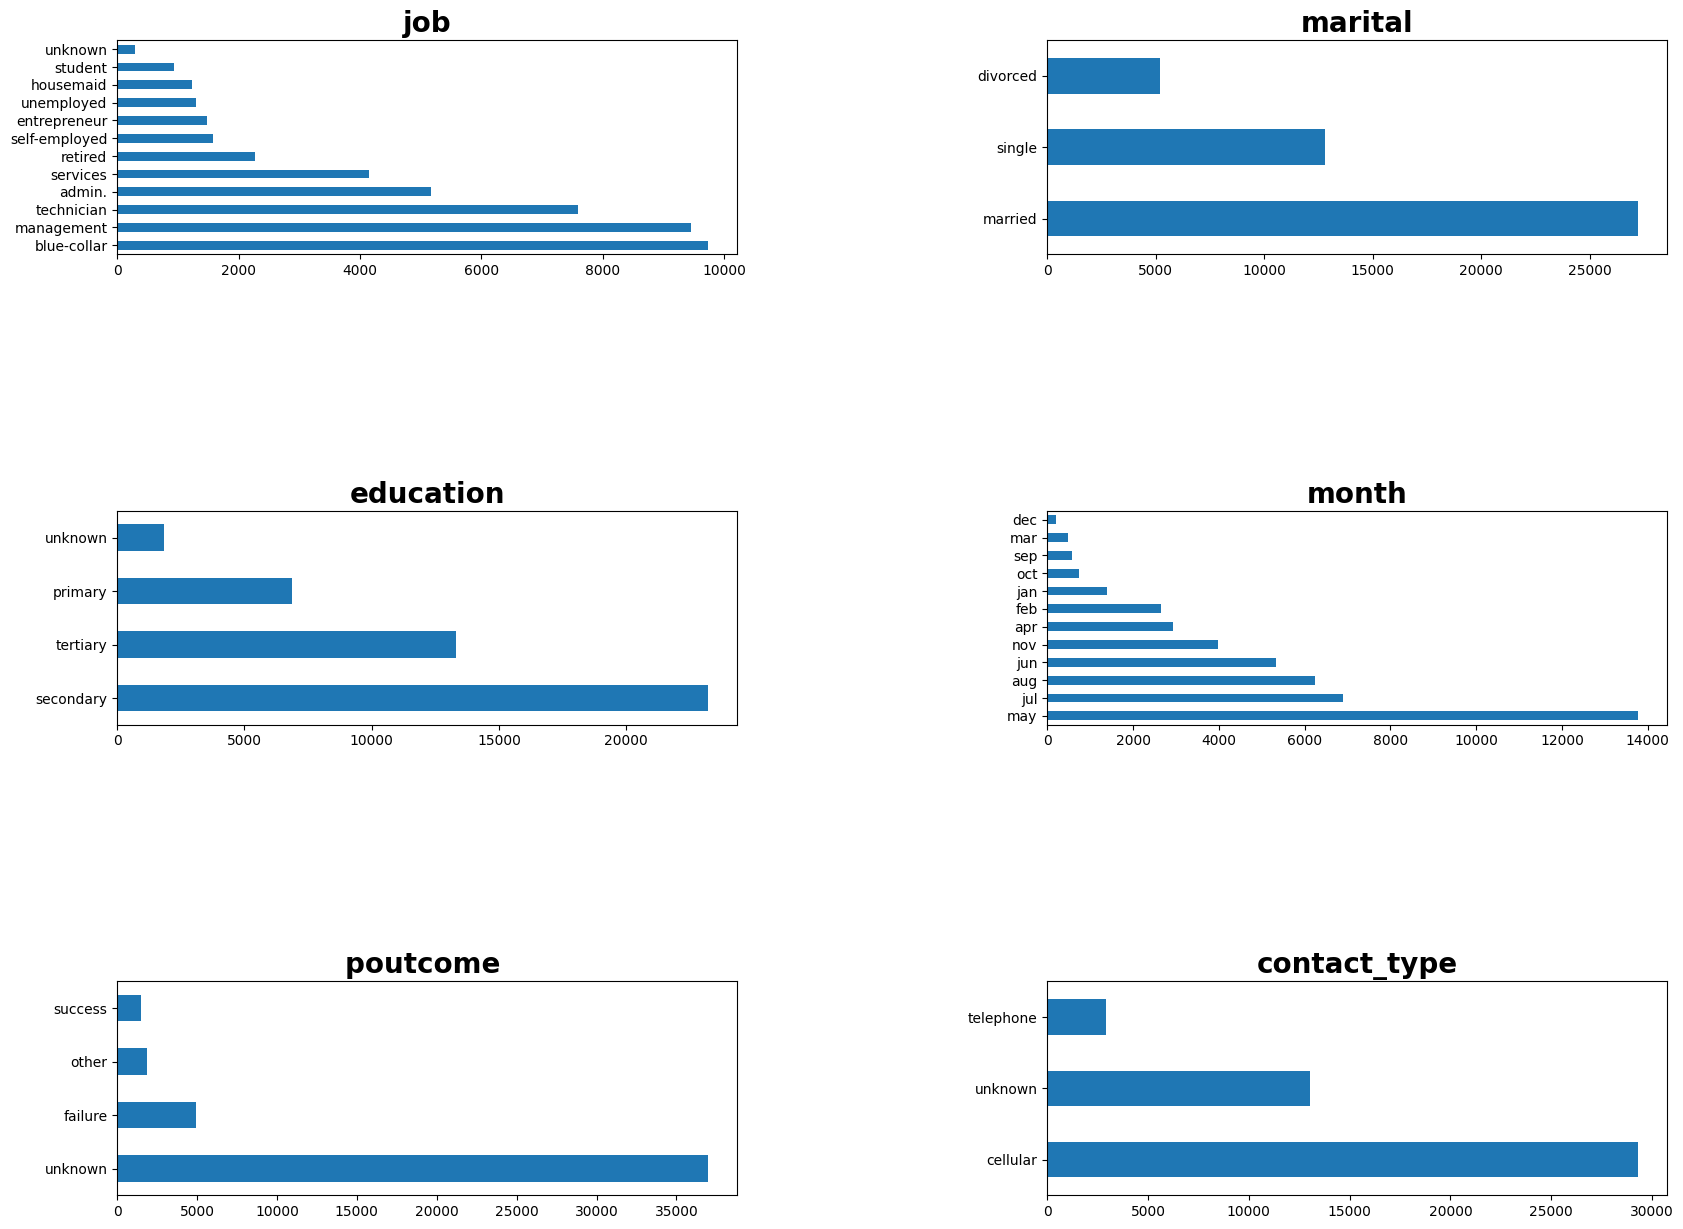

In [54]:
#check outliers
fig, ax = plt.subplots(3, 2, figsize=(20,15))
bank.job.value_counts().plot(kind='barh', ax=ax[0,0])
ax[0,0].set_title('job', fontweight="bold", size=20)

bank.marital.value_counts().plot(kind='barh', ax=ax[0,1])
ax[0,1].set_title('marital', fontweight="bold", size=20)

bank.education.value_counts().plot(kind='barh', ax=ax[1,0])
ax[1,0].set_title('education', fontweight="bold", size=20)

bank.month.value_counts().plot(kind='barh', ax=ax[1,1])
ax[1,1].set_title('month', fontweight="bold", size=20)

bank.poutcome.value_counts().plot(kind='barh', ax=ax[2,0])
ax[2,0].set_title('poutcome ', fontweight="bold", size=20)

bank.contact_type.value_counts().plot(kind='barh', ax=ax[2,1])
ax[2,1].set_title('contact_type', fontweight="bold", size=20)

plt.subplots_adjust(wspace=0.5,hspace=1.2);

In [55]:
#check outliers in column 'day'
bank['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [56]:
# Converted every observation to an integer in the 'subscriptions' and 'poutcome 'columns 
bank['subscription'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
bank['poutcome'].replace(['success', 'failure','unknown','other'],
                        [1, 0, 2, 3], inplace=True)


#### Numeric Features <a id = 'Numeric_Features'></a>

In [57]:
# check numeric features
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
poutcome,45211.0,1.790471,0.681057,0.0,2.0,2.0,2.0,3.0
subscription,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


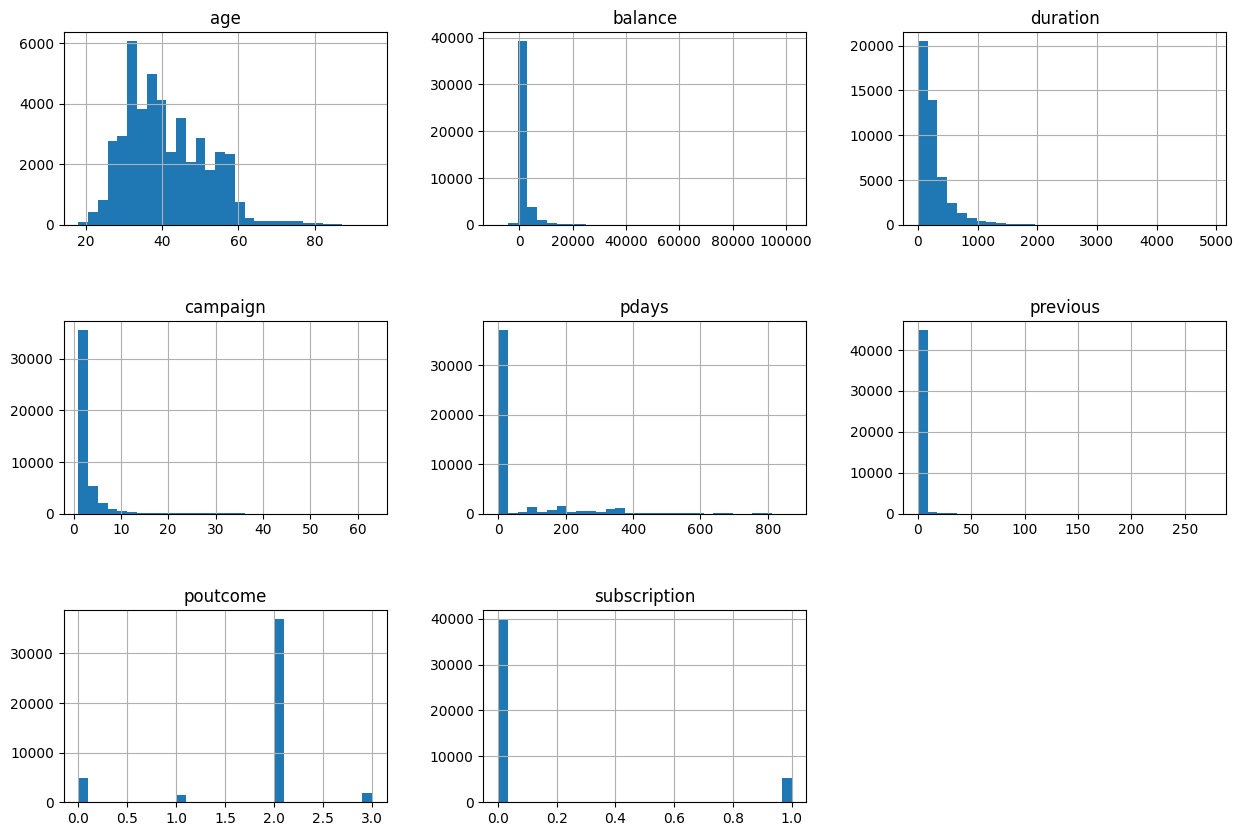

In [58]:
# check outliers
bank.hist(bins = 30, figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [59]:
#Check outliers in column 'previous'
bank.loc[bank.previous > 50]

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription
14260,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,353,58,3,1
21075,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,3,0
25041,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,776,55,0,1
37067,31,management,single,tertiary,no,358,yes,no,cellular,30,jan,68,3,256,51,0,0


__Note__: One person (21075) has an incredibly high previous contact numbers '275'. The data looks very suspicious, so we delete this one row. 

In [60]:
bank = bank[bank.previous < 60]

In [61]:
# Try to understand the differences between 'Other' and 'Unknown' in column 'poutcome'
bank.loc[bank.poutcome == 3]

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription
11,89,retired,divorced,primary,no,1323,no,no,telephone,29,dec,207,4,189,1,3,0
19,86,retired,married,secondary,no,1503,no,no,telephone,18,mar,165,3,101,1,3,0
33,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,3,1
39,84,retired,divorced,primary,no,1680,no,no,telephone,6,sep,113,5,97,3,3,0
61,83,housemaid,married,primary,no,2140,no,no,cellular,6,sep,109,3,276,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45152,20,student,single,primary,no,134,no,no,cellular,12,jul,273,1,277,3,3,0
45176,19,student,single,secondary,no,55,no,no,telephone,6,oct,89,2,193,1,3,0
45180,19,student,single,secondary,no,424,no,no,cellular,30,jun,121,3,195,2,3,0
45192,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,3,0


__Note__: 'other' means the clients had been contacted, but no result was obtained, while 'unknown' indicates the clients had not been contacted. 

In [62]:
bank[['poutcome','subscription']].value_counts().sort_index()

poutcome  subscription
0         0                4283
          1                 618
1         0                 533
          1                 978
2         0               33573
          1                3386
3         0                1532
          1                 307
dtype: int64

__Note__: One thing can be confusing is that while the poutcome is a success, the subscription is 'no.' It could be that the clients closed their term deposits between the last campaign and this campaign. Luckily, it only happened to 1% of the data.

In [63]:
#Check the relationship between pdays and previous
bank[bank.pdays == -1]['previous']

0        0
1        0
2        0
6        0
7        0
        ..
45204    0
45205    0
45206    0
45209    0
45210    0
Name: previous, Length: 36954, dtype: int64

__Note__: 'pdays = -1' associates with 'previous = 0', which means those people had not been contacted before. 

In [64]:
#Check the distribution of pdays
len(bank[bank.pdays> 365])

643

In [65]:
bank[bank.pdays> 730].sort_values(by = 'pdays', ascending = False).head()

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,month,duration,campaign,pdays,previous,poutcome,subscription
10222,49,unemployed,divorced,tertiary,no,780,no,no,cellular,8,nov,148,1,871,2,0,0
25765,37,management,divorced,tertiary,no,488,yes,no,cellular,17,sep,328,1,854,2,0,1
29134,35,management,single,tertiary,no,151,no,no,unknown,20,sep,11,1,850,2,0,0
37454,31,housemaid,married,secondary,no,243,yes,no,cellular,23,sep,305,2,842,1,0,1
17629,43,blue-collar,married,secondary,no,408,yes,no,unknown,14,sep,6,1,838,3,3,0


In [66]:
len(bank[bank.pdays> 730])

30

__Note__:It shows that more than 98% of the data is collected within a year. (525 data is collected between the first year and the third year)

### Derive New Features<a id='Derive_New_Features'></a>
***

In [67]:
#create a new feature of 'month_num'to denote the number of each month from the 'month' category column 
bank['month_num'] = bank['month'].apply(lambda x: datetime.strptime(x, '%b').month)
bank['month_num'] = bank['month_num'].astype(object)
bank['month_num'].value_counts()




5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2648
1      1403
10      738
9       579
3       477
12      214
Name: month_num, dtype: int64

In [68]:
bank = bank.drop(['month'], axis=1)

In [69]:
bank.head()

,age,job,marital,education,credits,balance,housing,loan,contact_type,day,duration,campaign,pdays,previous,poutcome,subscription,month_num
0,95,retired,married,secondary,no,0,no,no,telephone,1,215,1,-1,0,2,0,10
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,207,17,-1,0,2,1,4
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,212,1,-1,0,2,0,3
3,93,retired,married,unknown,no,775,no,no,cellular,4,476,2,13,9,1,1,8
4,93,retired,married,unknown,no,775,no,no,cellular,22,860,2,177,7,1,1,7


In [70]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45210 non-null  int64 
 1   job           45210 non-null  object
 2   marital       45210 non-null  object
 3   education     45210 non-null  object
 4   credits       45210 non-null  object
 5   balance       45210 non-null  int64 
 6   housing       45210 non-null  object
 7   loan          45210 non-null  object
 8   contact_type  45210 non-null  object
 9   day           45210 non-null  object
 10  duration      45210 non-null  int64 
 11  campaign      45210 non-null  int64 
 12  pdays         45210 non-null  int64 
 13  previous      45210 non-null  int64 
 14  poutcome      45210 non-null  int64 
 15  subscription  45210 non-null  int64 
 16  month_num     45210 non-null  object
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


### Save The Dataset<a id='Save_The_Dataset'></a>
***

In [71]:
bank_cleaned = bank.copy()
bank_cleaned.to_csv('../data/bank_cleaned.csv')